# comments
- the imputation has problem: impute by `age_group` and `gender`, but some entries of these two are NA...
- 

In [43]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',85)
pd.set_option('display.max_columns',85)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell; InteractiveShell.ast_node_interactivity = "all"
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *

In [44]:
pd.__version__

'1.4.0'

In [45]:
df= pd.read_csv("bank_data.csv")
df.info()
df.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41188 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
gender             object
balance            object
income_yr1        float64
income_yr2        float64
income_yr3        float64
dtype: object

In [46]:
pd.cut(df.age, [18,31,41,51,61,np.inf], right=False)
df['age_group'] = pd.cut(df.age, [18,31,41,51,61,np.inf], right=False)

0        [51.0, 61.0)
1        [51.0, 61.0)
2        [31.0, 41.0)
3        [31.0, 41.0)
4        [51.0, 61.0)
             ...     
41183     [61.0, inf)
41184    [41.0, 51.0)
41185    [51.0, 61.0)
41186    [41.0, 51.0)
41187     [61.0, inf)
Name: age, Length: 41188, dtype: category
Categories (5, interval[float64, left]): [[18.0, 31.0) < [31.0, 41.0) < [41.0, 51.0) < [51.0, 61.0) < [61.0, inf)]

In [47]:
df['income'] = df.filter(regex=r'income_yr[1-3]').mean(axis=1)

In [48]:
df.balance[:50]

0      2143 USD
1          29US
2       2.0 HKD
3           NaN
4          1 US
5         231HK
6       447 HKD
7           NaN
8        121 US
9        593 HK
10       270HKD
11       390 US
12        6 Usd
13         HK71
14        162US
15      229 HKD
16     13.0 USD
17        HK 52
18         HK60
19         0 HK
20      723 HKD
21       779 HK
22       23 HKD
23        50Usd
24         0USD
25       HK-372
26       HKD255
27      Usd 113
28      HK -246
29      265 HKD
30      839 USD
31        378US
32        39Usd
33          0US
34    USD 10635
35       Usd 63
36        -7 US
37        -3Usd
38       HKD506
39         0 HK
40      2586 US
41        49USD
42        104US
43       529 US
44         HK96
45      -171 HK
46     -364 USD
47        0 Usd
48         0Usd
49        0 HKD
Name: balance, dtype: object

In [49]:
# df.balance.str.upper().str.extract('([A-Z]+)?\s*(-?\d+\.?\d*)\s*([A-Z]+)?')

In [50]:
# temp = pd.concat([df.balance.str.extract('(-?\d+\.?\d*)').astype(float), df.balance.str.upper().str.extract('([a-zA-Z]+)').astype(str)], axis=1)
t1 = df.balance.str.extract('(-?\d+\.?\d*)').astype(float)[0]
t2 = df.balance.str.upper().str.extract('([a-zA-Z]+)').astype(str)[0]
t2.str.contains("(US)|(HK)|(nan)").all()

# t1
# t2
# t1.where(~t2.str.contains("(US)"), t1*7.8)
df['balance'] = t1.where(~t2.str.contains("(US)"), t1*7.8)
# (t1*7.8).where(t2.str.contains("(US)"), t1)
# np.where(t2.str.contains("(US)"), t1*7.8, t1)


# df['balance'] = np.where(t2.str.contains("(US)"), t1*7.8, t1)



# pd.Series(np.where(t2.str.contains("(US)"), t1*7.8, t1))


# t1[:30]
# t1

# t1 * 7.8

# t3


# t1[t3] = t1[t3]*7.8


/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_71647/2263547399.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  t2.str.contains("(US)|(HK)|(nan)").all()


True

/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_71647/2263547399.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['balance'] = t1.where(~t2.str.contains("(US)"), t1*7.8)


In [51]:
t1 = df.groupby(['age_group','gender']).balance.transform('median')
t2 = df.groupby(['age_group','gender']).balance.transform(lambda s: s.fillna(s.median()))
df.balance.fillna(t1).isna().sum()
df['balance'] = t2
df.balance.isna().sum() # still have some NA...

0

5

In [52]:
# df.shape
df['income'] = df.groupby('education').income.transform(lambda s: s.fillna(s.median))

In [53]:
# df.notna().all()
# df.loc[:, df.notna().all()]


# df.filter(df.notna().all(), axis=1)

# df
# df.dropna().isna().sum()

df=df.dropna()

In [54]:
df.y

0         no
2         no
3         no
4         no
6         no
        ... 
41182     no
41183    yes
41184     no
41185     no
41186    yes
Name: y, Length: 28692, dtype: object

0         no
2         no
3         no
4         no
6         no
        ... 
41182     no
41183    yes
41184     no
41185     no
41186    yes
Name: y, Length: 28692, dtype: object

0.3091096348586647

0.1845714422210578

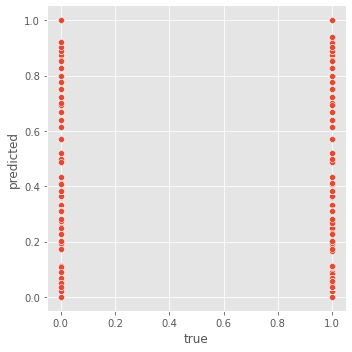

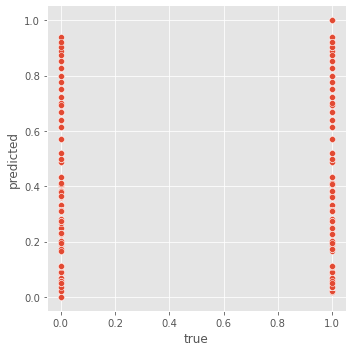

In [59]:
X=df.drop(columns='y')
y=df.y
y
y = y.replace({'yes':1, 'no':0})
# # df.info()
X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

model = LogisticRegression(max_depth=8).fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

y_pred = model.predict(X_test)
sns.relplot(x=y_test, y=y_pred, kind='scatter').set(ylabel='predicted', xlabel='true')
sns.relplot(x=y_train, y=model.predict(X_train), kind='scatter').set(ylabel='predicted', xlabel='true')

In [15]:
s1 = df.balance.fillna(df.groupby(['age_group','gender']).balance.transform('median'))


df.shape
df.balance.shape
df.balance.fillna(df.groupby(['age_group','gender']).balance.transform('median')).shape


pd.Index(range(41188)).difference(df.groupby(['age_group','gender']).balance.transform(lambda s: s.fillna(s.median())).index)

# df.balance[37140]


# s2 = df.groupby(['age_group','gender']).balance.transform(lambda s: s.fillna(s.median()))

# s1.equals(s2)
# np.allclose(s1,s2)

(41188, 27)

(41188,)

(41188,)

Int64Index([37140, 37539, 37558, 37579, 38274], dtype='int64')

In [13]:
df.dropna() # drop a row if contains any missing
# df[~df.isna().any(axis=1)] # same as above 

df.dropna(axis=1) # drop a columns if contains any missing
# df.loc[:, ~df.isna().any(axis=0)] # same as above

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,gender,balance,income_yr1,income_yr2,income_yr3,age_group,income
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,F,16715.4,2.786048e+05,2.664948e+05,2.588092e+05,"[51.0, 61.0)",2.679696e+05
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,F,2.0,3.221064e+05,3.167844e+05,2.603720e+05,"[31.0, 41.0)",2.997543e+05
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,M,1349.4,2.568696e+05,2.273920e+05,1.995468e+05,"[31.0, 41.0)",2.279361e+05
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,F,7.8,2.404423e+05,2.155838e+05,2.032015e+05,"[51.0, 61.0)",2.197425e+05
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,M,447.0,2.228729e+06,2.173573e+06,2.008920e+06,"[51.0, 61.0)",2.137074e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no,M,522.6,3.330995e+05,2.990894e+05,2.697439e+05,"[18.0, 31.0)",3.006443e+05
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,F,10253.0,2.337070e+06,2.213367e+06,1.960756e+06,"[61.0, inf)",2.170398e+06
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,F,2706.6,1.638964e+06,1.536481e+06,1.354816e+06,"[41.0, 51.0)",1.510087e+06
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,F,77703.6,9.549360e+05,9.581220e+05,8.436968e+05,"[51.0, 61.0)",9.189183e+05


,age,marital,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,gender,income_yr1
0,56,married,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,F,2.786048e+05
1,57,married,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,F,3.013433e+05
2,37,married,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,F,3.221064e+05
3,40,married,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,M,2.568696e+05
4,56,married,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,F,2.404423e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,married,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,F,2.337070e+06
41184,46,married,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,F,1.638964e+06
41185,56,married,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,F,9.549360e+05
41186,44,married,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,M,2.248269e+06
